## 相關性分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.family']='SimHei' #顯示中文

# 政府開放資料平台 - 不動產買賣實價登錄批次資料（http://data.gov.tw/node/6213）
df = pd.read_csv('/Users/ethan/Desktop/AI/python資料科學/python-data-science-practice/Basic Machine Learning/(Mac) w4-1. 基礎機器學習/A_LVR_LAND_A.csv', encoding='big5')
df[:10]

,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
0,133.85,3,2,2,13600000
1,74.08,0,2,1,19700000
2,109.87,3,2,2,12550000
3,50.02,1,1,1,9800000
4,81.38,3,2,2,15800000
5,23.01,0,0,0,3150000
6,0.00,0,0,0,3322200
7,129.84,3,2,2,17000000
8,156.72,3,2,2,27230000
9,279.71,4,2,2,28200000


In [2]:
df.corr()

,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
建物移轉總面積平方公尺,1.000000,0.195329,0.159584,0.303817,0.627678
建物現況格局-房,0.195329,1.000000,0.343025,0.503330,0.142180
建物現況格局-廳,0.159584,0.343025,1.000000,0.672597,0.089311
建物現況格局-衛,0.303817,0.503330,0.672597,1.000000,0.284548
總價元,0.627678,0.142180,0.089311,0.284548,1.000000


/Users/ethan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


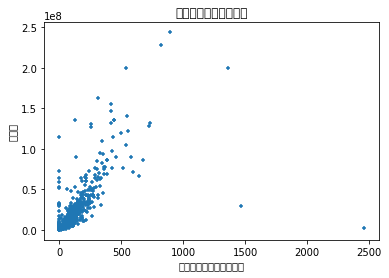

In [3]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
df.plot(kind='scatter',title='散佈圖（高度正相關）',figsize=(6,4),x='建物移轉總面積平方公尺',y='總價元',marker='+')

## 資料預處理

/Users/ethan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


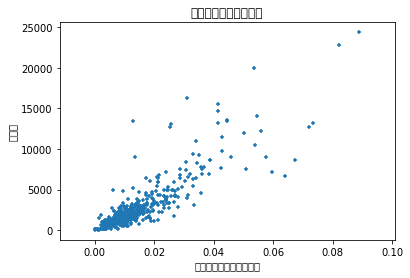

In [4]:
df = df[df['建物移轉總面積平方公尺']>0]
df = df[df['建物移轉總面積平方公尺']<1000]
df = df[df['總價元']>0]/10000
df.plot(kind='scatter',title='散佈圖（高度正相關）',figsize=(6,4),x='建物移轉總面積平方公尺',y='總價元',marker='+')

簡單線性切分訓練及測試資料 (1 feature)

In [5]:
from sklearn.model_selection import train_test_split
X = df[['建物移轉總面積平方公尺']]
y = df[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
161,0.008318
111,0.003412
465,0.003912
367,0.010434
56,0.011584


各變項參數: 
 [[222490.38215284]]
均方誤差 (Mean squared error, MSE): 1495498.72


/Users/ethan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


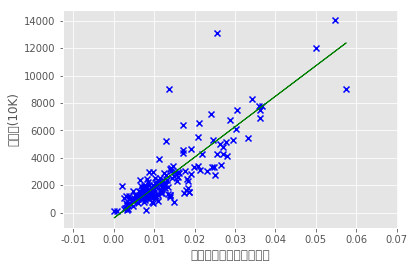

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
plt.style.use('ggplot')

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

## 多變項線性迴歸
### 切分訓練及測試資料 (2 features)

In [7]:
from sklearn.model_selection import train_test_split
X = df[['建物移轉總面積平方公尺','建物現況格局-衛']]
y = df[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,建物現況格局-衛
277,0.000011,0.0000
201,0.008170,0.0001
483,0.005660,0.0001
641,0.003740,0.0001
591,0.026954,0.0002


### 標準化 (Normalize)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_nor = sc.transform(X_train)
X_test_nor = sc.transform(X_test)
X_train_nor[:10]

array([[-1.1779801 , -1.48088144],
       [-0.45249246, -0.45256139],
       [-0.67567839, -0.45256139],
       [-0.84640228, -0.45256139],
       [ 1.21775632,  0.57575866],
       [-0.80425482, -0.45256139],
       [-0.19782931,  0.57575866],
       [-0.86560872, -1.48088144],
       [-0.65424898, -0.45256139],
       [-0.83430934, -1.48088144]])

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
plt.style.use('ggplot')

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_nor, y_train)

print('各變項參數(normalized): \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test_nor) - y_test) ** 2))

各變項參數(normalized): 
 [[2626.4059323  -344.24594883]]
均方誤差 (Mean squared error, MSE): 2353661.71


## 多項式(Polynomial) 非線性迴歸
### 切分訓練及測試資料 (1 feature)

In [10]:
from sklearn.model_selection import train_test_split
X = df[['建物移轉總面積平方公尺']]
y = df[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
459,0.019903
164,0.008729
176,0.006765
593,0.020904
427,0.007836


### 創造高維變項

各變項參數: 
 [[     0.         176760.8519837  620197.19747251]]
均方誤差 (Mean squared error, MSE): 2731864.35


/Users/ethan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


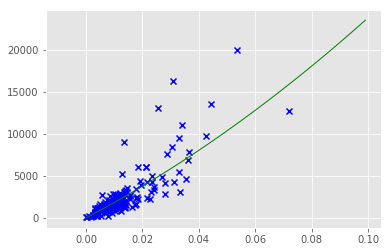

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('ggplot')

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

X_fit = pd.DataFrame(np.arange(0,0.1,0.001))

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

# Plot outputs
plt.scatter(X_test_raw, y_test,  color='blue', marker = 'x')
plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)

plt.show()